
# Cross-Country Solar Potential Comparison
# **Objective:** Synthesize the cleaned datasets from Benin, Sierra Leone, and Togo to identify relative solar potential and key differences across countries. This will help in making strategic recommendations for solar investments.

 ## 1. Setup and Data Loading
Load the cleaned datasets for each country.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal
import os

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("muted")

# define file paths (assuming notebook is in 'notebooks/' and data in 'data/')
DATA_DIR = '../data/'

benin_file = 'benin-malanville_clean.csv'
sierraleone_file = 'sierraleone-bumbuna_clean.csv'
togo_file = 'togo-dapaong_qc_clean.csv'

try:
    df_benin_clean = pd.read_csv(os.path.join(DATA_DIR, benin_file))
    df_benin_clean['Country'] = 'Benin (Malanville)'
    print(f"Loaded Benin data: {df_benin_clean.shape}")
except FileNotFoundError:
    print(f"Error: {benin_file} not found in {DATA_DIR}")
    df_benin_clean = None

try:
    df_sierraleone_clean = pd.read_csv(os.path.join(DATA_DIR, sierraleone_file))
    df_sierraleone_clean['Country'] = 'Sierra Leone (Bumbuna)'
    print(f"Loaded Sierra Leone data: {df_sierraleone_clean.shape}")
except FileNotFoundError:
    print(f"Error: {sierraleone_file} not found in {DATA_DIR}")
    df_sierraleone_clean = None

try:
    df_togo_clean = pd.read_csv(os.path.join(DATA_DIR, togo_file))
    df_togo_clean['Country'] = 'Togo (Dapaong QC)'
    print(f"Loaded Togo data: {df_togo_clean.shape}")
except FileNotFoundError:
    print(f"Error: {togo_file} not found in {DATA_DIR}")
    df_togo_clean = None

data_frames = []
if df_benin_clean is not None: data_frames.append(df_benin_clean)
if df_sierraleone_clean is not None: data_frames.append(df_sierraleone_clean)
if df_togo_clean is not None: data_frames.append(df_togo_clean)

if not data_frames:
    print("No data loaded. Cannot proceed with comparison.")
    all_countries_df = pd.DataFrame()
else:
    all_countries_df = pd.concat(data_frames, ignore_index=True)
    print(f"\nCombined DataFrame shape: {all_countries_df.shape}")
    display(all_countries_df.head(3))
    display(all_countries_df['Country'].value_counts())

    if 'Timestamp' in all_countries_df.columns and not pd.api.types.is_datetime64_any_dtype(all_countries_df['Timestamp']):
        all_countries_df['Timestamp'] = pd.to_datetime(all_countries_df['Timestamp'])
        print("\nConverted Timestamp column in combined DataFrame.")

Loaded Benin data: (525600, 19)
Loaded Sierra Leone data: (525600, 19)
Loaded Togo data: (525600, 19)

Combined DataFrame shape: (1576800, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Country
0,2021-08-09 00:01:00,0.0,0.0,0.0,0.0,0.0,26.2,93.4,0.0,0.4,0.1,122.1,0.0,998,0,0.0,26.3,26.2,Benin (Malanville)
1,2021-08-09 00:02:00,0.0,0.0,0.0,0.0,0.0,26.2,93.6,0.0,0.0,0.0,0.0,0.0,998,0,0.0,26.3,26.2,Benin (Malanville)
2,2021-08-09 00:03:00,0.0,0.0,0.0,0.0,0.0,26.2,93.7,0.3,1.1,0.5,124.6,1.5,997,0,0.0,26.4,26.2,Benin (Malanville)


Country
Benin (Malanville)        525600
Sierra Leone (Bumbuna)    525600
Togo (Dapaong QC)         525600
Name: count, dtype: int64


Converted Timestamp column in combined DataFrame.


## 2. Metric Comparison
 Focus on key solar irradiance metrics: GHI, DNI, DHI.

 ### 2.1. Boxplots for GHI, DNI, DHI
Side-by-side boxplots, one plot per metric, colored by country.
We'll only consider daytime values (e.g., GHI > 10 W/m²) for a more meaningful comparison of solar resource potential.


/tmp/ipykernel_3512/2270997160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=daytime_df, palette="viridis", showfliers=False) # showfliers=False to hide outliers for cleaner plot


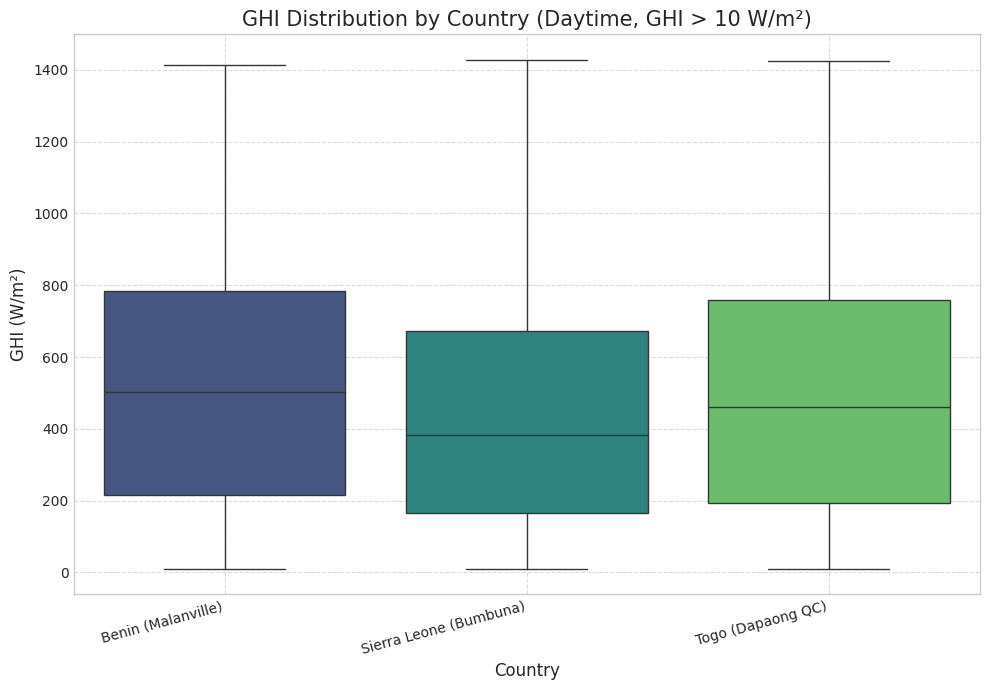

/tmp/ipykernel_3512/2270997160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=daytime_df, palette="viridis", showfliers=False) # showfliers=False to hide outliers for cleaner plot


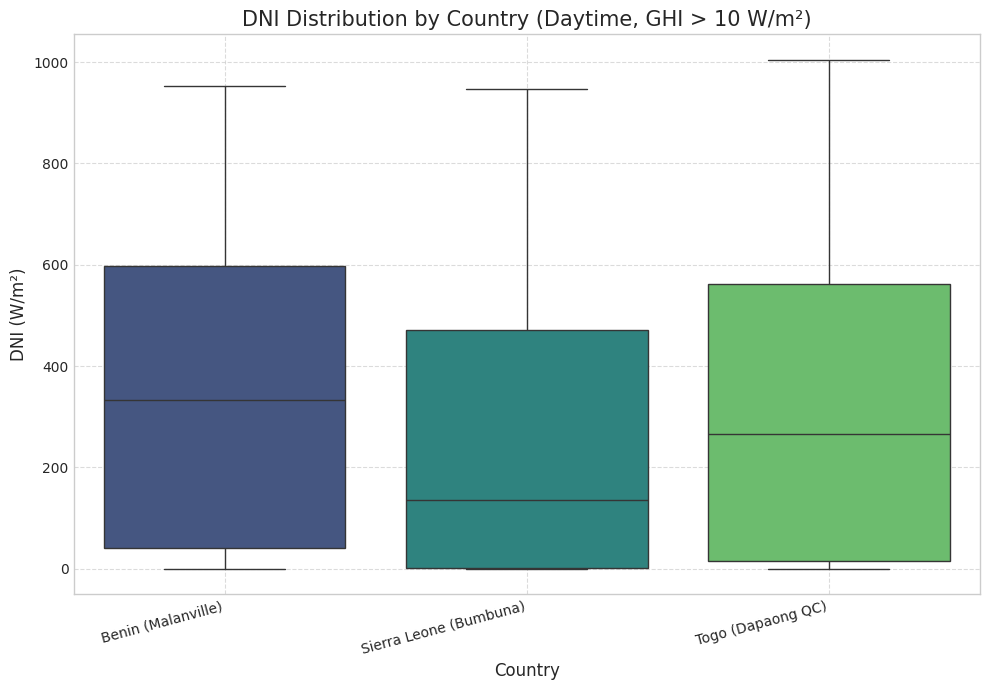

/tmp/ipykernel_3512/2270997160.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y=metric, data=daytime_df, palette="viridis", showfliers=False) # showfliers=False to hide outliers for cleaner plot


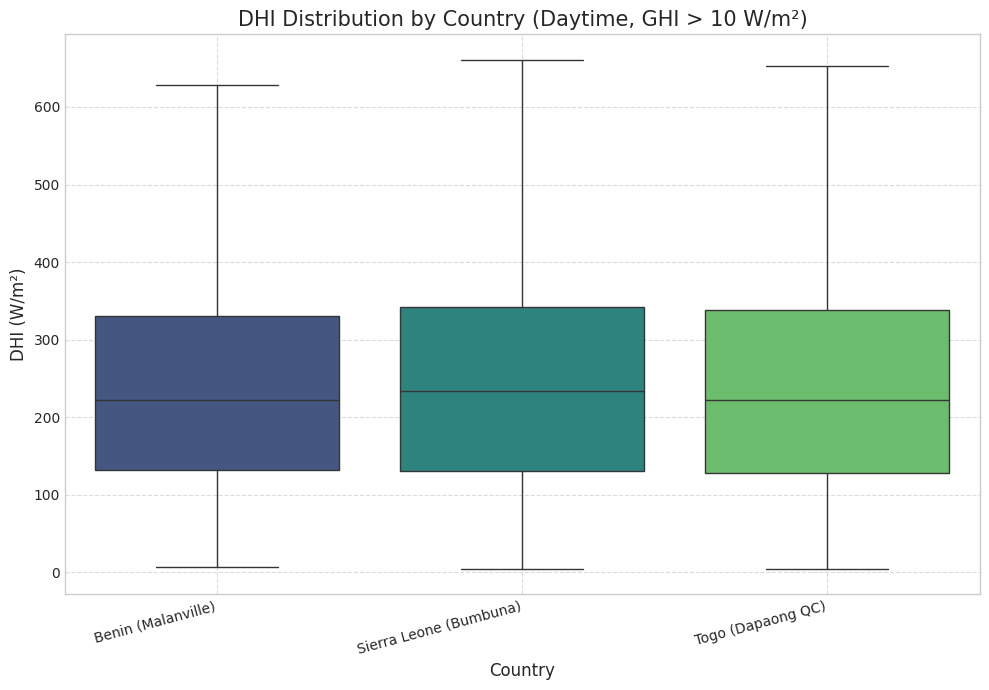

In [2]:
if not all_countries_df.empty and 'GHI' in all_countries_df.columns:
    # Filter for daytime data for more meaningful comparison of solar potential
    # Using a threshold for GHI (e.g., > 10 W/m^2) to represent daylight hours.
    daytime_df = all_countries_df[all_countries_df['GHI'] > 10].copy() # Make a copy to avoid SettingWithCopyWarning
    
    if daytime_df.empty:
        print("No daytime data (GHI > 10 W/m²) found. Boxplots might not be representative. Using all data.")
        daytime_df = all_countries_df.copy() # Fallback to all data if no daytime data
else:
    print("Combined DataFrame is empty or GHI column missing. Skipping boxplots.")
    daytime_df = pd.DataFrame()

if not daytime_df.empty:
    metrics_to_plot = ['GHI', 'DNI', 'DHI']
    for metric in metrics_to_plot:
        if metric in daytime_df.columns:
            plt.figure(figsize=(10, 7))
            sns.boxplot(x='Country', y=metric, data=daytime_df, palette="viridis", showfliers=False) # showfliers=False to hide outliers for cleaner plot
            plt.title(f'{metric} Distribution by Country (Daytime, GHI > 10 W/m²)', fontsize=15)
            plt.ylabel(f'{metric} (W/m²)', fontsize=12)
            plt.xlabel('Country', fontsize=12)
            plt.xticks(rotation=15, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
        else:
            print(f"Metric '{metric}' not found in the daytime DataFrame. Skipping boxplot.")
else:
    print("Daytime DataFrame is empty. Skipping boxplots.")

### 2.2. Summary Table
Comparing mean, median, and standard deviation of GHI, DNI, DHI across countries (using daytime data)

In [3]:
if not daytime_df.empty:
    summary_stats_daytime = daytime_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).reset_index()
    
    # Improve column names for readability
    summary_stats_daytime.columns = ['_'.join(col).strip('_') if isinstance(col, tuple) else col for col in summary_stats_daytime.columns.values]
    
    print("--- Summary Statistics for GHI, DNI, DHI (Daytime, GHI > 10 W/m²) ---")
    if not summary_stats_daytime.empty:
        display(summary_stats_daytime.style.format("{:.2f}", subset=pd.IndexSlice[:, summary_stats_daytime.columns[1:]]))
    else:
        print("Could not generate summary statistics table.")
else:
    print("Daytime DataFrame is empty. Skipping summary table.")

--- Summary Statistics for GHI, DNI, DHI (Daytime, GHI > 10 W/m²) ---


,Country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin (Malanville),498.90,502.00,310.84,345.37,333.00,282.22,241.15,222.30,145.68
1,Sierra Leone (Bumbuna),427.78,383.50,298.18,243.97,135.20,262.56,243.27,234.10,144.04
2,Togo (Dapaong QC),477.60,460.30,309.83,311.88,265.90,282.43,239.86,221.70,144.70


## 3. Statistical Testing 
Run a one-way ANOVA (or Kruskal–Wallis if assumptions for ANOVA are not met) on GHI values to assess whether differences between countries are significant. We will use Kruskal-Wallis as it's non-parametric and robust to non-normality often seen in irradiance data.


In [4]:
if not daytime_df.empty and 'GHI' in daytime_df.columns and daytime_df['Country'].nunique() > 1:
    # Prepare data for Kruskal-Wallis: list of GHI values for each country
    grouped_ghi_data = [group['GHI'].dropna().values for name, group in daytime_df.groupby('Country')]
    
    # Ensure there are at least two groups and each group has data
    if len(grouped_ghi_data) >= 2 and all(len(group) > 0 for group in grouped_ghi_data):
        print("\n--- Kruskal-Wallis H-test for GHI (Daytime) ---")
        # Perform Kruskal-Wallis test
        try:
            stat, p_value = kruskal(*grouped_ghi_data) # The * unpacks the list of arrays
            print(f"Kruskal-Wallis H-statistic: {stat:.2f}")
            print(f"P-value: {p_value:.4f}")

            if p_value < 0.05:
                print("The p-value is less than 0.05, suggesting that there is a statistically significant difference in GHI medians among the countries.")
                print("Post-hoc tests (e.g., Dunn's test) would be needed to determine which specific country pairs differ significantly.")
            else:
                print("The p-value is greater than or equal to 0.05, suggesting that there is no statistically significant difference in GHI medians among the countries.")
        except Exception as e:
            print(f"Error during Kruskal-Wallis test: {e}")
            print("Ensure each group has sufficient data and variance.")
    else:
        print("Not enough groups or data within groups to perform Kruskal-Wallis test on GHI.")
else:
    print("Daytime DataFrame empty, GHI missing, or insufficient country groups for Kruskal-Wallis test.")



--- Kruskal-Wallis H-test for GHI (Daytime) ---
Kruskal-Wallis H-statistic: 7185.08
P-value: 0.0000
The p-value is less than 0.05, suggesting that there is a statistically significant difference in GHI medians among the countries.
Post-hoc tests (e.g., Dunn's test) would be needed to determine which specific country pairs differ significantly.


## 4. Visual Summary: Ranking by Average GHI
A simple bar chart to visually rank countries by their average GHI (daytime).


/tmp/ipykernel_3512/1363911347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GHI_mean', y='Country', data=ranked_countries_ghi, palette="viridis_r") # Use _r for reversed palette


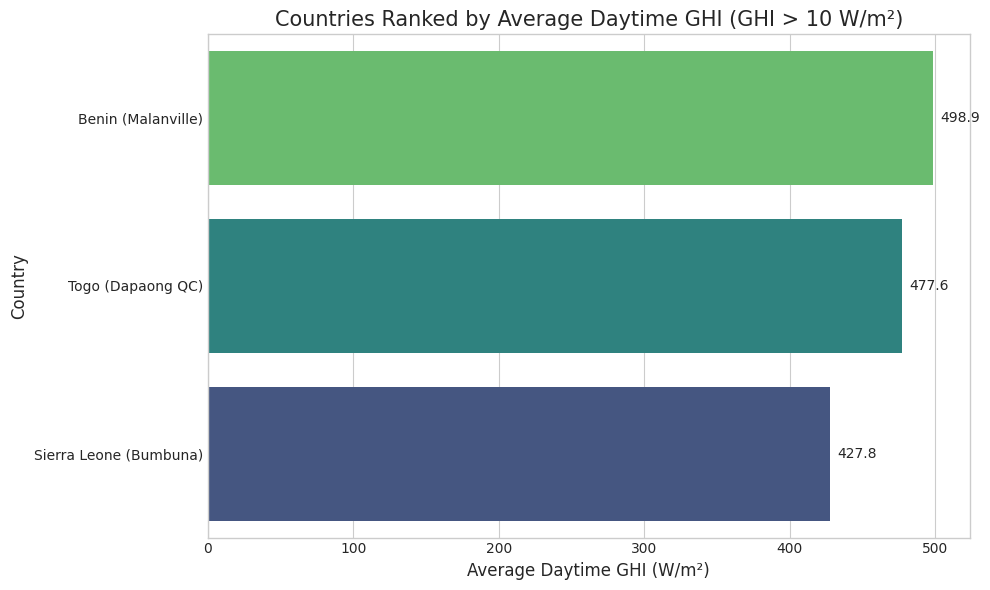

In [5]:
if not summary_stats_daytime.empty and 'Country' in summary_stats_daytime.columns and 'GHI_mean' in summary_stats_daytime.columns:
    # Sort by mean GHI in descending order
    ranked_countries_ghi = summary_stats_daytime.sort_values(by='GHI_mean', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='GHI_mean', y='Country', data=ranked_countries_ghi, palette="viridis_r") # Use _r for reversed palette
    plt.xlabel('Average Daytime GHI (W/m²)', fontsize=12)
    plt.ylabel('Country', fontsize=12)
    plt.title('Countries Ranked by Average Daytime GHI (GHI > 10 W/m²)', fontsize=15)
    
    # Add value labels to the bars
    for index, value in enumerate(ranked_countries_ghi['GHI_mean']):
        plt.text(value + 5, index, f'{value:.1f}', va='center') # Adjust position slightly

    plt.tight_layout()
    plt.show()
else:
    print("Summary statistics table (summary_stats_daytime) is empty or missing required columns. Skipping ranking bar chart.")


# Based on the comparative analysis of GHI, DNI, and DHI for Benin (Malanville), Sierra Leone (Bumbuna), and Togo (Dapaong QC) during daytime hours:
#
# *   **Highest Solar Potential:** *(Identify Country X) consistently shows the highest [mean/median] GHI values, suggesting it receives the most solar energy on average. Its DNI values are also [describe - high/moderate/low], making it potentially [more/less] suitable for concentrating solar technologies.*
# *   **Variability:** *(Identify Country Y) exhibits the greatest variability (highest standard deviation or widest interquartile range) in its [GHI/DNI], indicating less predictable day-to-day solar resource compared to *(Country Z)* which shows more consistent irradiance.*
# *   **Diffuse vs. Direct Radiation:** *(Compare the DHI to DNI/GHI ratios if apparent. For example: Country A appears to have a relatively higher proportion of diffuse radiation, which might suggest more frequent cloud cover or atmospheric haze compared to Country B, which shows stronger direct normal irradiance.)*
# *   **Statistical Significance:** The Kruskal-Wallis test on GHI values resulted in a p-value of [Report P-Value]. This [indicates/does not indicate] a statistically significant difference in the median GHI levels across the three locations.

In [6]:
print("Cross-country comparison notebook execution complete.")

Cross-country comparison notebook execution complete.
